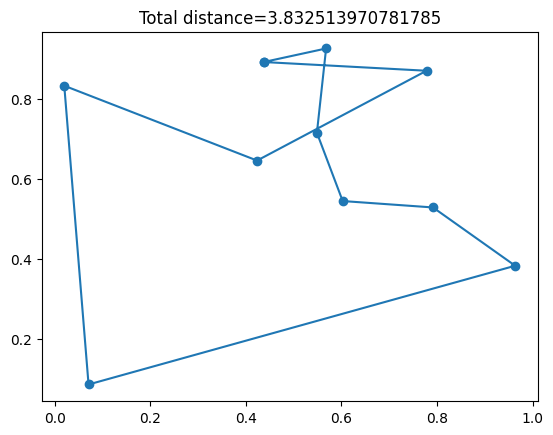

T=   0.18000 , distance=   3.83251 acc.steps=101


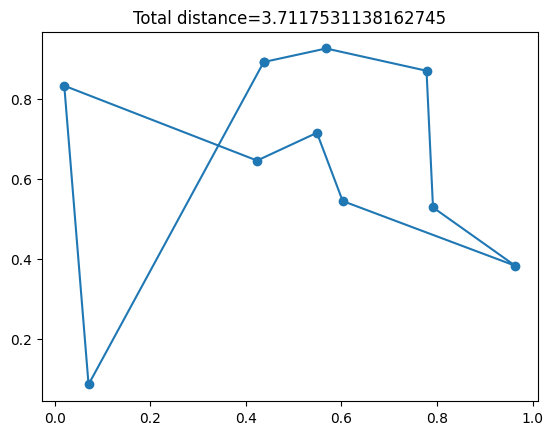

T=   0.16200 , distance=   3.71175 acc.steps=101


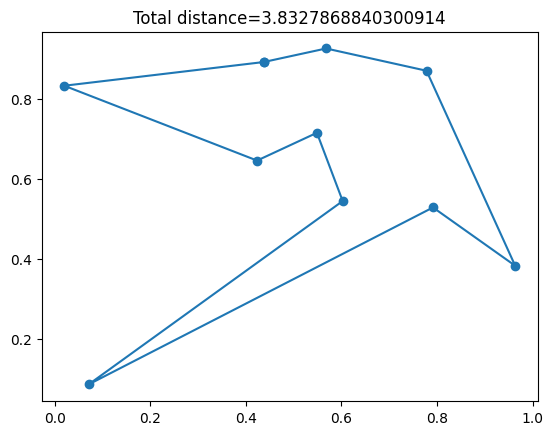

T=   0.14580 , distance=   3.83279 acc.steps=101


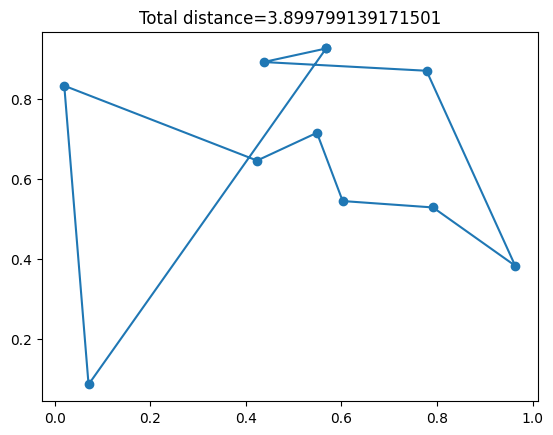

T=   0.13122 , distance=   3.89980 acc.steps=101


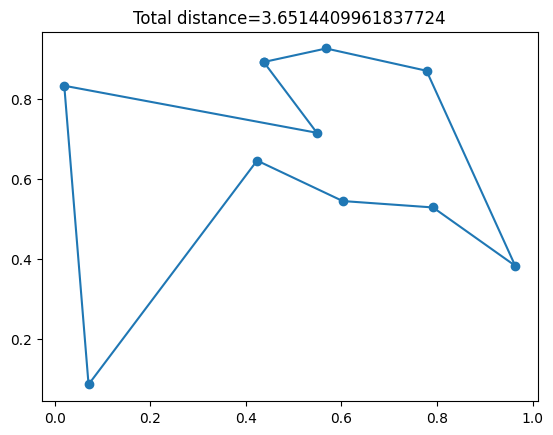

T=   0.11810 , distance=   3.65144 acc.steps=101


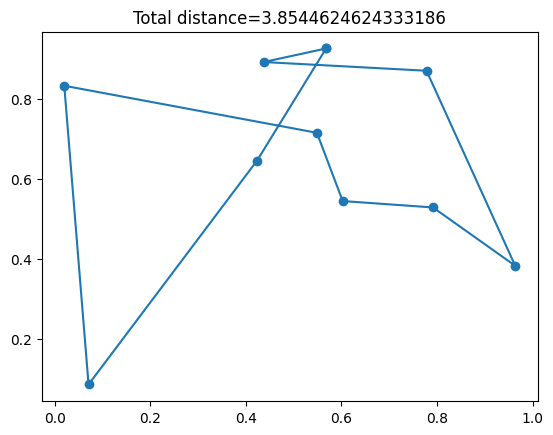

T=   0.10629 , distance=   3.85446 acc.steps=101


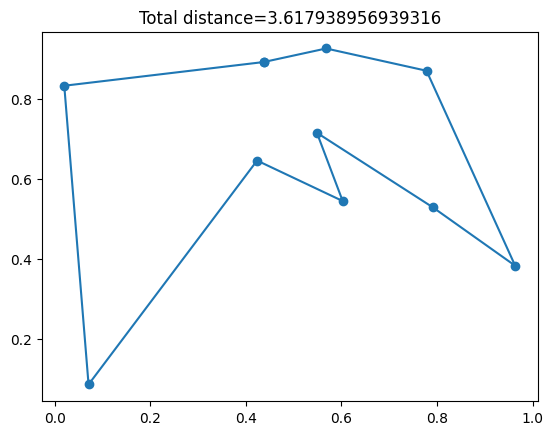

T=   0.09566 , distance=   3.61794 acc.steps=101


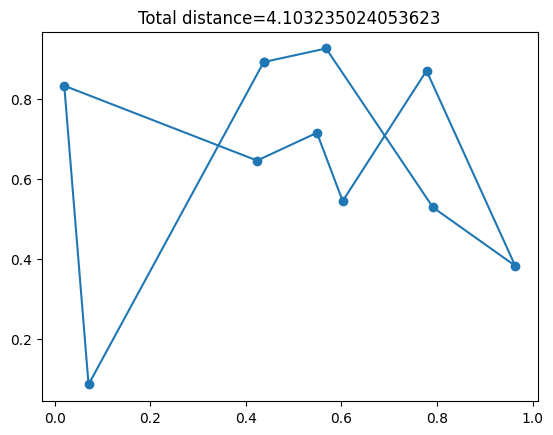

T=   0.08609 , distance=   4.10324 acc.steps=101


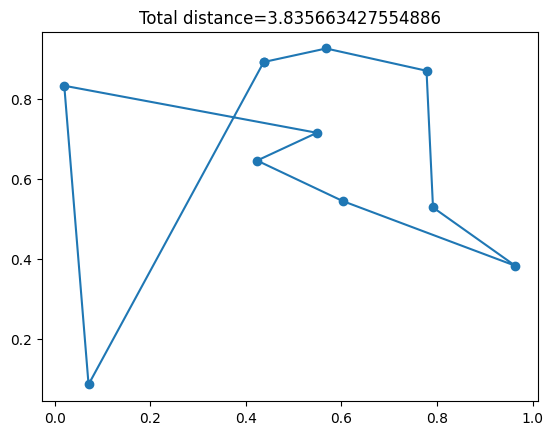

T=   0.07748 , distance=   3.83566 acc.steps=101


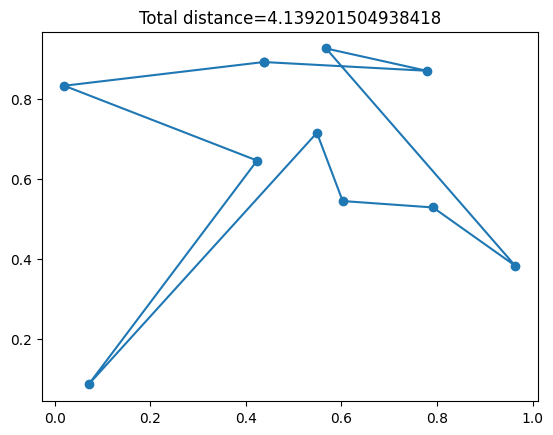

T=   0.06974 , distance=   4.13920 acc.steps=101


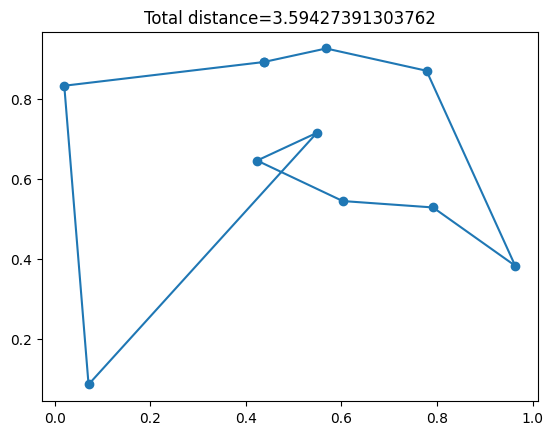

T=   0.06276 , distance=   3.59427 acc.steps=101


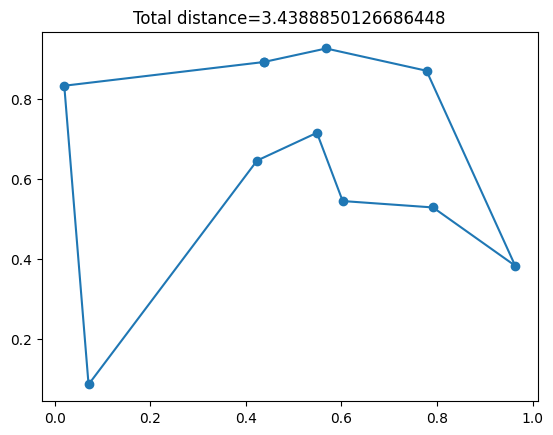

T=   0.05649 , distance=   3.43889 acc.steps=101


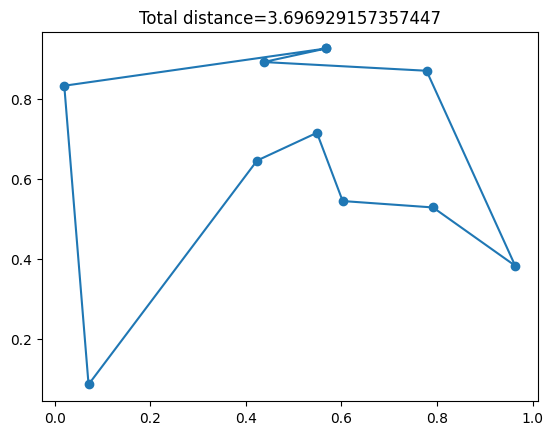

T=   0.05084 , distance=   3.69693 acc.steps=101


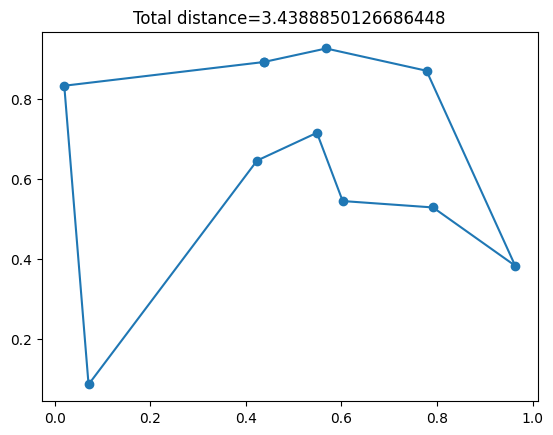

T=   0.04575 , distance=   3.43889 acc.steps=101


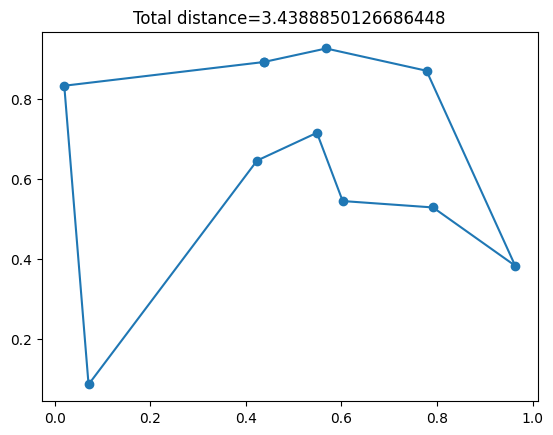

T=   0.04118 , distance=   3.43889 acc.steps=96


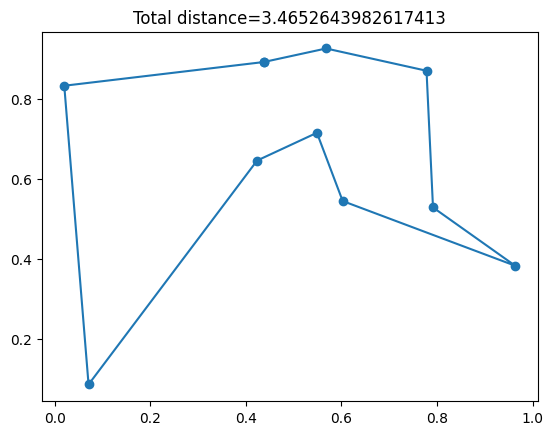

T=   0.03706 , distance=   3.46526 acc.steps=89


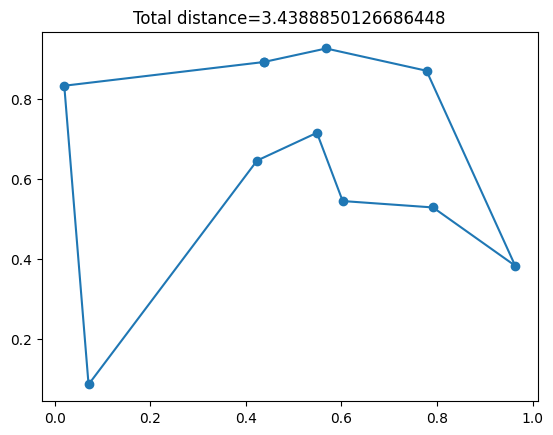

T=   0.03335 , distance=   3.43889 acc.steps=89


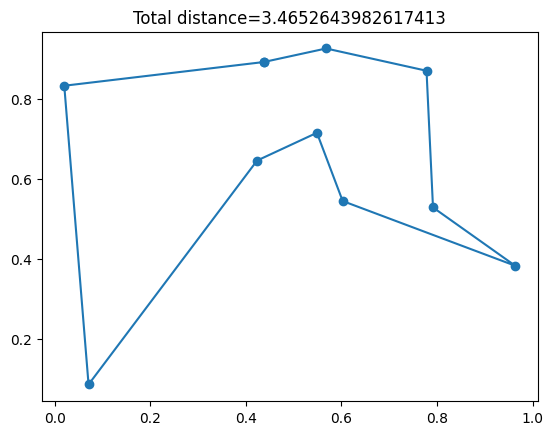

T=   0.03002 , distance=   3.46526 acc.steps=73


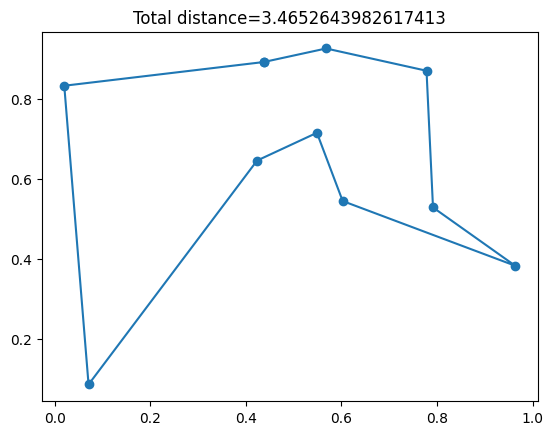

T=   0.02702 , distance=   3.46526 acc.steps=76


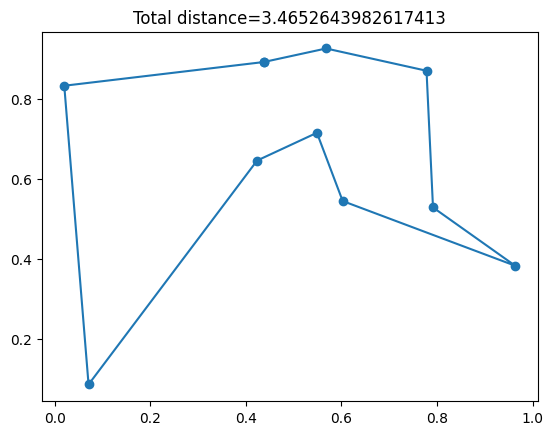

T=   0.02432 , distance=   3.46526 acc.steps=52


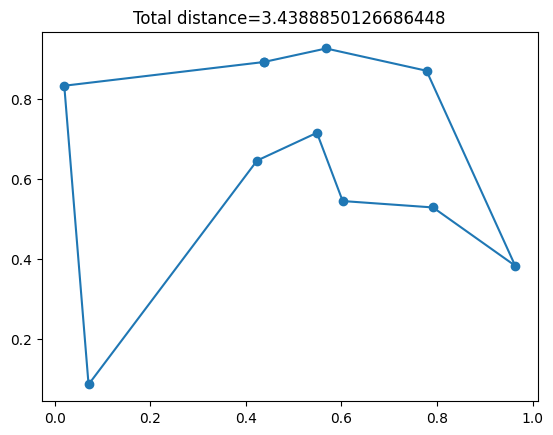

T=   0.02188 , distance=   3.43889 acc.steps=39


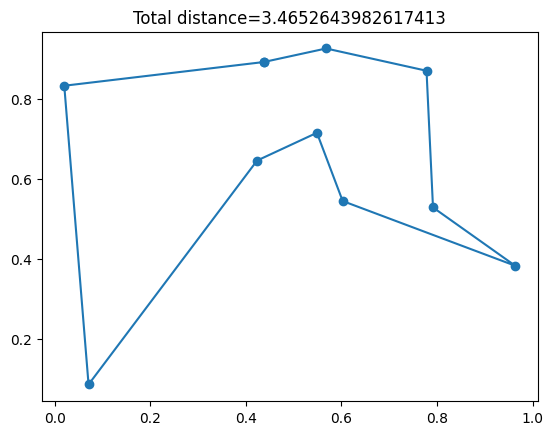

T=   0.01970 , distance=   3.46526 acc.steps=61


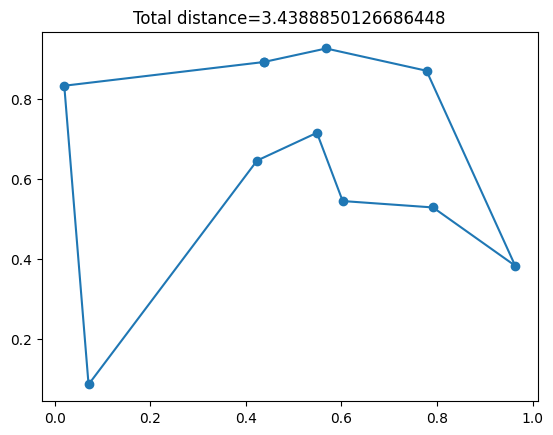

T=   0.01773 , distance=   3.43889 acc.steps=39


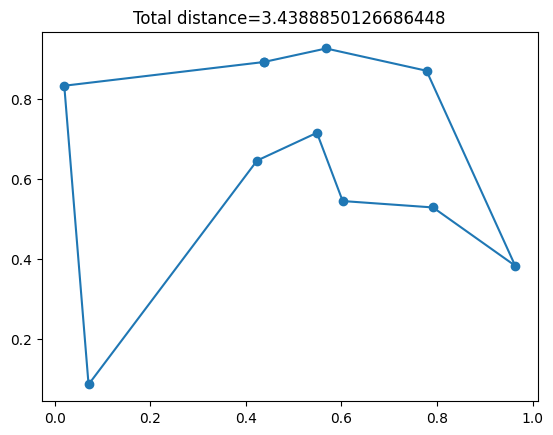

T=   0.01595 , distance=   3.43889 acc.steps=56


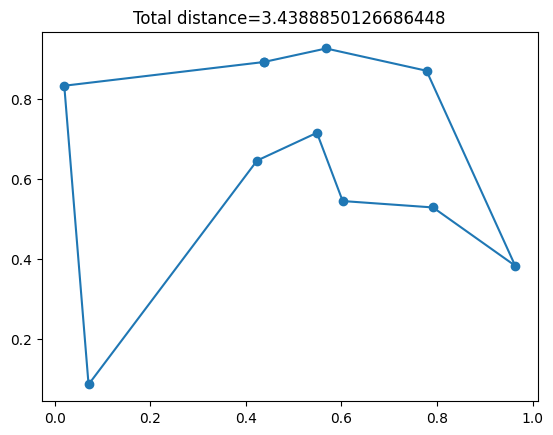

T=   0.01436 , distance=   3.43889 acc.steps=32


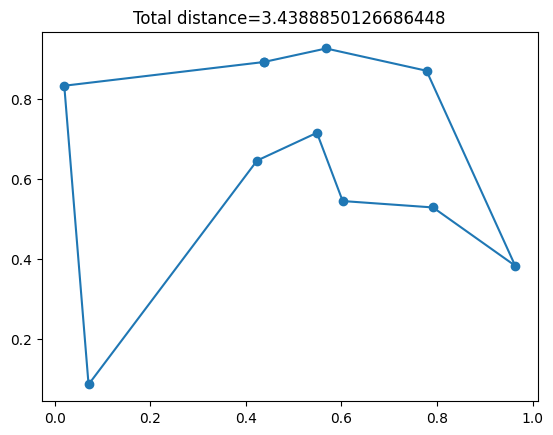

T=   0.01292 , distance=   3.43889 acc.steps=24


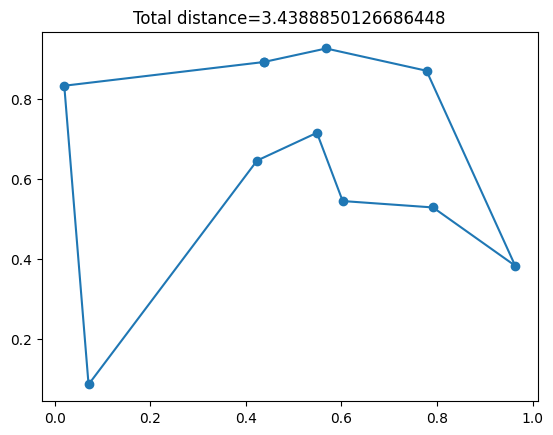

T=   0.01163 , distance=   3.43889 acc.steps=20


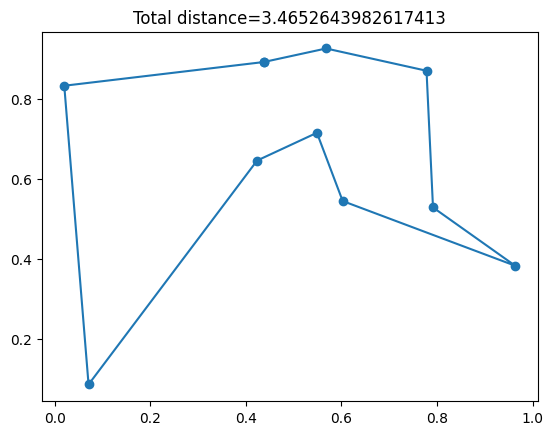

T=   0.01047 , distance=   3.46526 acc.steps=21


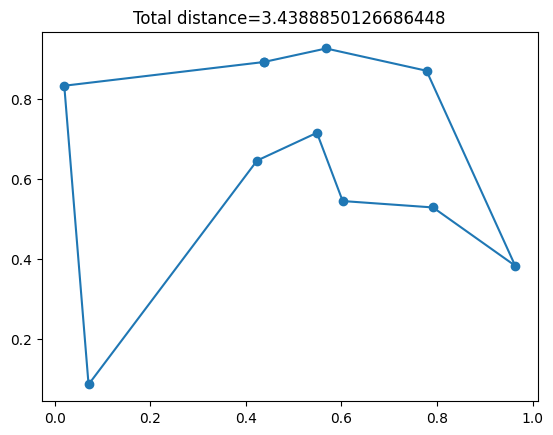

T=   0.00942 , distance=   3.43889 acc.steps=23


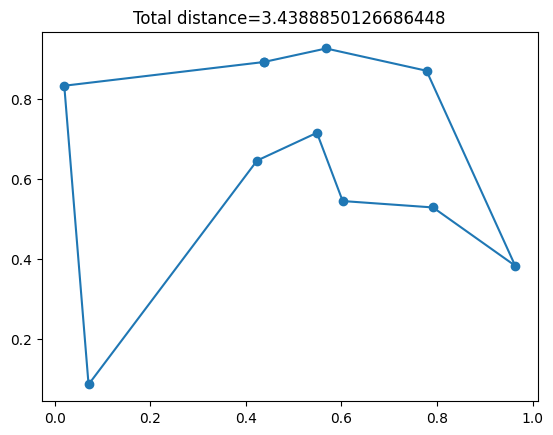

T=   0.00848 , distance=   3.43889 acc.steps=14


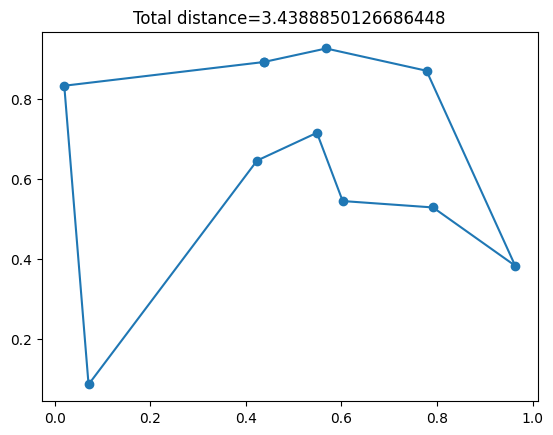

T=   0.00763 , distance=   3.43889 acc.steps=2


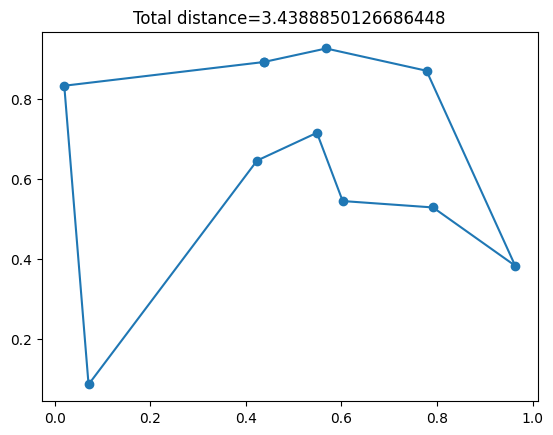

T=   0.00687 , distance=   3.43889 acc.steps=4


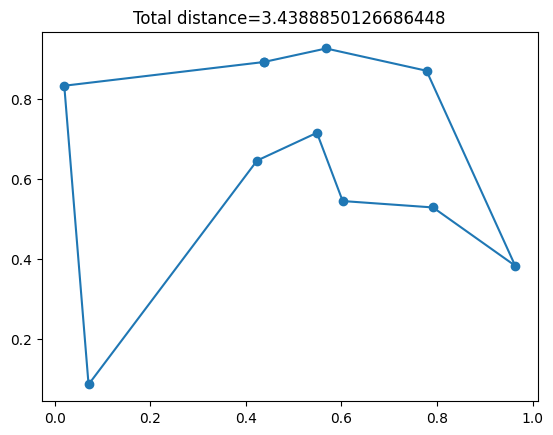

T=   0.00618 , distance=   3.43889 acc.steps=8


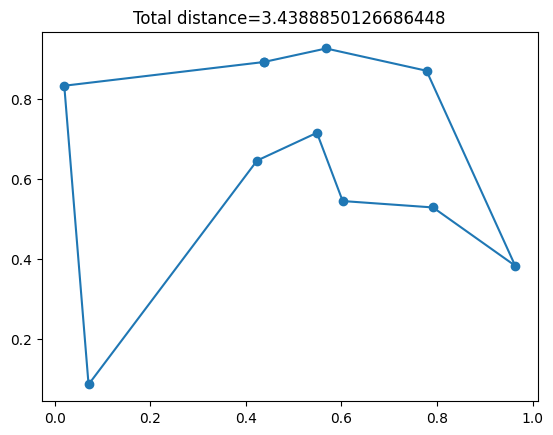

T=   0.00556 , distance=   3.43889 acc.steps=0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

ncity = 100

# n개의 도시를 위한 2D 랜덤 좌표 생성
R = np.random.random((ncity, 2))
city = list(range(ncity))

def Distance(R1, R2):
    return np.linalg.norm(R1 - R2)

def TotalDistance(city, R):
    dist = 0
    for i in range(len(city) - 1):
        dist += Distance(R[city[i]], R[city[i + 1]])
    dist += Distance(R[city[-1]], R[city[0]])  # 시작 도시로 돌아오는 거리
    return dist

def Plot(city, R, dist):
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = np.array(Pt)
    plt.title('Total distance=' + str(dist))
    plt.plot(Pt[:, 0], Pt[:, 1], 'o-')
    plt.show()

def Swap(city, n):
    city_copy = city[:]
    current = city_copy[n - 1]
    # 교환
    city_copy[n - 1] = city_copy[n]
    city_copy[n] = current
    return city_copy

def CostSwap(R, city, n):
    current_cost = TotalDistance(city, R)
    swapped_city = Swap(city, n)
    new_cost = TotalDistance(swapped_city, R)
    return new_cost - current_cost, swapped_city

def TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps):
    T = Tstart
    dist = TotalDistance(city, R)
    for t in range(maxTsteps):
        accepted = 0
        for i in range(maxSteps):
            # 교환 시도
            n = np.random.randint(1, len(city))  # n이 유효한 범위 내에 있는지 확인
            de, new_city = CostSwap(R, city, n)
            if de < 0 or np.exp(-de / T) > np.random.rand():
                accepted += 1
                dist += de
                city = new_city  # 교환이 받아들여졌을 때만 도시 리스트 업데이트
            if accepted > maxAccepted:
                break
        T *= fCool
        Plot(city, R, dist)
        print("T=%10.5f , distance=%10.5f acc.steps=%d" % (T, dist, accepted))
        if accepted == 0:
            break
    return city

# 파라미터 설정
ncity = 10
maxSteps = 100 * ncity
maxAccepted = 10 * ncity
Tstart = 0.2
fCool = 0.9
maxTsteps = 100

np.random.seed(0)

R = np.random.random((ncity, 2))
city = list(range(ncity))

city = TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps)
